In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import plotly 
import plotly.express as px
import plotly.offline as pyo
from plotly.offline import init_notebook_mode, plot,iplot
import cufflinks as cf
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [12]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [13]:
df = pd.read_csv(r'D:\Disease Prediction\kidney_disease.csv')

In [14]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [16]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [17]:
columns_to_retain = ['sg','al','sc','hemo','pcv','wbcc','rbcc','htn','classification']
df = df.drop([col for col in df.columns if not col in columns_to_retain],axis=1)

df = df.dropna(axis=0)

In [67]:
df.shape

(287, 7)

In [18]:
for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])

C:\Users\Dwij\AppData\Local\Temp\ipykernel_32960\3251675387.py:2: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.



In [19]:
df.head()

,sg,al,sc,hemo,pcv,htn,classification
0,1.020,1.0,1.2,15.4,28,1,0
1,1.020,4.0,0.8,11.3,22,0,0
2,1.010,2.0,1.8,9.6,15,0,0
3,1.005,4.0,3.8,11.2,16,1,0
4,1.010,2.0,1.4,11.6,19,0,0


In [22]:
X = df.drop(['classification'],axis=1)
Y = df['classification']

In [23]:
from sklearn.model_selection import train_test_split

In [60]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=10,test_size=0.5,shuffle=True)

In [68]:
X_train.shape

(143, 6)

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train.values,Y_train)

DecisionTreeClassifier(max_depth=4)

In [64]:
prediction = dt.predict(X_test.values)

In [65]:
accuracy_dt = accuracy_score(Y_test,prediction)*100

In [66]:
accuracy_dt

96.52777777777779

In [31]:
prediciton = [1 if Y>=0.5 else 0 for Y in prediction]

print('Original:{0}.'.format(", ".join(str(x) for x in Y_test)))
print('Predicted:{0}.'.format(", ".join(str(x) for x in prediction)))

Original:0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0.
Predicted:0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0.


In [ ]:
#knn model

In [36]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler().fit(X)
X_std = std.transform(X)

In [53]:
X_train_std,X_test_std,Y_train,Y_test = train_test_split(X_std,Y,random_state=10,test_size=0.5,shuffle=True)

In [54]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_std,Y_train)

KNeighborsClassifier(n_neighbors=15)

In [55]:
prediction_knn = knn.predict(X_test_std)

In [56]:
accuracy_knn = accuracy_score(Y_test,prediction_knn)*100

In [57]:
accuracy_knn

96.52777777777779

In [58]:
k_range = range(1,26)
scores = {}

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_std,Y_train)
    prediction_knn = knn.predict(X_test_std)
    scores[k] = accuracy_score(Y_test,prediction_knn)

In [59]:
scores

{1: 0.9930555555555556,
 2: 0.9930555555555556,
 3: 0.9930555555555556,
 4: 0.9930555555555556,
 5: 0.9861111111111112,
 6: 0.9930555555555556,
 7: 0.9861111111111112,
 8: 0.9861111111111112,
 9: 0.9861111111111112,
 10: 0.9861111111111112,
 11: 0.9861111111111112,
 12: 0.9861111111111112,
 13: 0.9722222222222222,
 14: 0.9722222222222222,
 15: 0.9652777777777778,
 16: 0.9652777777777778,
 17: 0.9652777777777778,
 18: 0.9652777777777778,
 19: 0.9513888888888888,
 20: 0.9513888888888888,
 21: 0.9513888888888888,
 22: 0.9583333333333334,
 23: 0.9513888888888888,
 24: 0.9513888888888888,
 25: 0.9444444444444444}

In [69]:
#Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:

model = LogisticRegression()

In [72]:
model.fit(X_train,Y_train)

LogisticRegression()

In [73]:
prediction_lr = model.predict(X_test)

In [74]:
accuracy_lr = accuracy_score(prediction_lr,Y_test)*100

In [75]:
accuracy_lr

95.83333333333334

In [76]:
#Comparing the algorithms

<AxesSubplot: xlabel='Algorithms', ylabel='Accuracy score'>

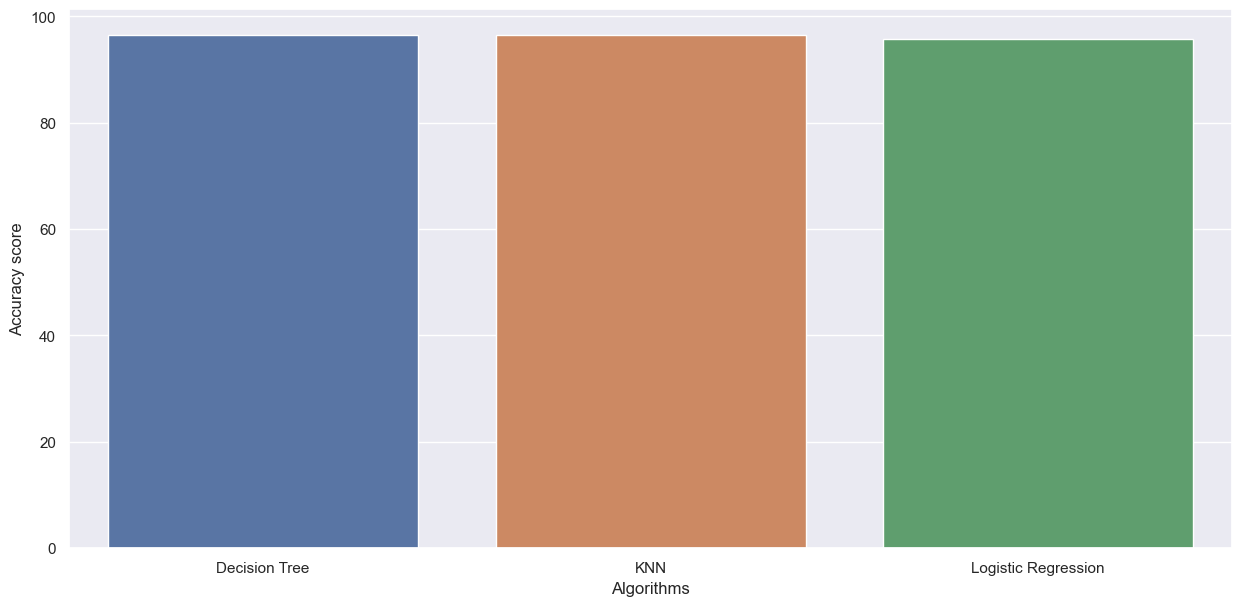

In [77]:
algorithms=['Decision Tree','KNN','Logistic Regression']
scores=[accuracy_dt,accuracy_knn,accuracy_lr]


# In[93]:


sns.set(rc={'figure.figsize':(15,7)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(data=df,x=algorithms,y=scores)

In [78]:
import pickle

In [83]:
filename = 'kidney_model.sav'
pickle.dump(dt,open(filename,'wb'))

In [84]:
loaded_model = pickle.load(open('kidney_model.sav','rb'))

In [86]:
df.to_csv('D:\Disease Prediction\kidney_modified1.csv')